# Libraries

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from google.colab import drive
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
tf.random.set_seed(42)
np.random.seed(42)

# Dataframe

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tesi/Agrimonia_scaled_Bertonico.csv")
pd.set_option('display.max_columns', None)

df.head()

,Unnamed: 0,IDStations,Latitude,Longitude,Time,Altitude,AQ_pm10,AQ_nh3,AQ_nox,AQ_no2,WE_temp_2m,WE_wind_speed_10m_mean,WE_wind_speed_10m_max,WE_tot_precipitation,WE_precipitation_t,WE_surface_pressure,WE_solar_radiation,WE_rh_min,WE_rh_mean,WE_rh_max,WE_wind_speed_100m_mean,WE_wind_speed_100m_max,WE_blh_layer_max,WE_blh_layer_min,EM_nh3_livestock_mm,EM_nh3_agr_soils,EM_nh3_agr_waste_burn,EM_nh3_sum,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LI_pigs_v2,LI_bovine_v2,LA_hvi,LA_lvi,LA_land_use,LA_soil_use,wind_dir_10m_N,wind_dir_100m_N,wind_dir_10m_S,wind_dir_100m_S,wind_dir_10m_E,wind_dir_100m_E,wind_dir_10m_O,wind_dir_100m_O,wind_dir_10m_NE,wind_dir_100m_NE,wind_dir_10m_NO,wind_dir_100m_NO,wind_dir_10m_SO,wind_dir_100m_SO,wind_dir_10m_SE,wind_dir_100m_SE
0,4384,0.0,0.0,0.0,2016-01-01,0.0,0.361111,0.187541,0.169904,0.282810,0.133232,0.085441,0.112459,0.000011,0.000000,0.710983,0.209027,0.669497,0.840646,0.971037,0.060817,0.074656,0.061210,0.005039,0.003703,0.005021,0.314432,0.004290,0.505559,0.690451,0.892958,0.483245,1.000000,0.000000,0.384937,0.001179,0.003807,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4385,0.0,0.0,0.0,2016-01-02,0.0,0.270833,0.072131,0.135456,0.302741,0.096618,0.170360,0.175662,0.214557,0.166667,0.556840,0.016265,0.923586,0.964518,0.989766,0.176173,0.193587,0.037907,0.051926,0.004526,0.005889,0.304480,0.005208,0.507314,0.686191,0.890141,0.486185,0.989011,0.007823,0.380753,0.001179,0.003807,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4386,0.0,0.0,0.0,2016-01-03,0.0,0.180556,0.049836,0.127760,0.293174,0.136445,0.267975,0.301458,0.040182,0.166667,0.383430,0.122342,0.840430,0.921590,0.989959,0.293446,0.352442,0.062212,0.141779,0.005226,0.006711,0.293849,0.006062,0.509070,0.682286,0.887655,0.489124,0.989011,0.014342,0.376569,0.001179,0.003807,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4387,0.0,0.0,0.0,2016-01-04,0.0,0.201389,0.047213,0.108386,0.222380,0.125409,0.143309,0.300480,0.058296,0.166667,0.200385,0.057699,0.845923,0.897988,0.983588,0.172888,0.343952,0.059602,0.017870,0.005925,0.007491,0.282766,0.006851,0.510825,0.678026,0.885501,0.492063,0.978022,0.020860,0.376569,0.001179,0.002538,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4388,0.0,0.0,0.0,2016-01-05,0.0,0.236111,0.075410,0.162633,0.273722,0.115206,0.098820,0.099011,0.018412,0.166667,0.211946,0.043669,0.894743,0.960558,0.986098,0.120138,0.130859,0.029551,0.022666,0.006542,0.008234,0.271230,0.007577,0.511995,0.673766,0.883513,0.495003,0.967033,0.028683,0.372385,0.001179,0.002538,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#df['IDStations'] = df['IDStations'].astype(float)
df['AQ_pm10'] = df['AQ_pm10'].astype(float)
df['AQ_nh3'] = df['AQ_nh3'].astype(float)
df['AQ_nox'] = df['AQ_nox'].astype(float)
df['AQ_no2'] = df['AQ_no2'].astype(float)

df['EM_nh3_livestock_mm'] = df['EM_nh3_livestock_mm'].astype(float)
df['EM_nh3_agr_soils'] = df['EM_nh3_agr_soils'].astype(float)
df['EM_nh3_agr_waste_burn'] = df['EM_nh3_agr_waste_burn'].astype(float)
df['EM_nh3_sum'] = df['EM_nh3_sum'].astype(float)
df['EM_nox_traffic'] = df['EM_nox_traffic'].astype(float)
df['EM_nox_sum'] = df['EM_nox_sum'].astype(float)
df['EM_so2_sum'] = df['EM_so2_sum'].astype(float)
df['LI_pigs'] = df['LI_pigs'].astype(float)
df['LI_bovine'] = df['LI_bovine'].astype(float)

In [6]:
df.dropna(inplace=True)
df

,Unnamed: 0,IDStations,Latitude,Longitude,Time,Altitude,AQ_pm10,AQ_nh3,AQ_nox,AQ_no2,WE_temp_2m,WE_wind_speed_10m_mean,WE_wind_speed_10m_max,WE_tot_precipitation,WE_precipitation_t,WE_surface_pressure,WE_solar_radiation,WE_rh_min,WE_rh_mean,WE_rh_max,WE_wind_speed_100m_mean,WE_wind_speed_100m_max,WE_blh_layer_max,WE_blh_layer_min,EM_nh3_livestock_mm,EM_nh3_agr_soils,EM_nh3_agr_waste_burn,EM_nh3_sum,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LI_pigs_v2,LI_bovine_v2,LA_hvi,LA_lvi,LA_land_use,LA_soil_use,wind_dir_10m_N,wind_dir_100m_N,wind_dir_10m_S,wind_dir_100m_S,wind_dir_10m_E,wind_dir_100m_E,wind_dir_10m_O,wind_dir_100m_O,wind_dir_10m_NE,wind_dir_100m_NE,wind_dir_10m_NO,wind_dir_100m_NO,wind_dir_10m_SO,wind_dir_100m_SO,wind_dir_10m_SE,wind_dir_100m_SE
0,4384,0.0,0.0,0.0,2016-01-01,0.0,0.361111,0.187541,0.169904,0.282810,0.133232,0.085441,0.112459,0.000011,0.000000,0.710983,0.209027,0.669497,0.840646,0.971037,0.060817,0.074656,0.061210,0.005039,0.003703,0.005021,0.314432,0.004290,0.505559,0.690451,0.892958,0.483245,1.000000,0.000000,0.384937,0.001179,0.003807,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4385,0.0,0.0,0.0,2016-01-02,0.0,0.270833,0.072131,0.135456,0.302741,0.096618,0.170360,0.175662,0.214557,0.166667,0.556840,0.016265,0.923586,0.964518,0.989766,0.176173,0.193587,0.037907,0.051926,0.004526,0.005889,0.304480,0.005208,0.507314,0.686191,0.890141,0.486185,0.989011,0.007823,0.380753,0.001179,0.003807,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4386,0.0,0.0,0.0,2016-01-03,0.0,0.180556,0.049836,0.127760,0.293174,0.136445,0.267975,0.301458,0.040182,0.166667,0.383430,0.122342,0.840430,0.921590,0.989959,0.293446,0.352442,0.062212,0.141779,0.005226,0.006711,0.293849,0.006062,0.509070,0.682286,0.887655,0.489124,0.989011,0.014342,0.376569,0.001179,0.003807,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4387,0.0,0.0,0.0,2016-01-04,0.0,0.201389,0.047213,0.108386,0.222380,0.125409,0.143309,0.300480,0.058296,0.166667,0.200385,0.057699,0.845923,0.897988,0.983588,0.172888,0.343952,0.059602,0.017870,0.005925,0.007491,0.282766,0.006851,0.510825,0.678026,0.885501,0.492063,0.978022,0.020860,0.376569,0.001179,0.002538,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4388,0.0,0.0,0.0,2016-01-05,0.0,0.236111,0.075410,0.162633,0.273722,0.115206,0.098820,0.099011,0.018412,0.166667,0.211946,0.043669,0.894743,0.960558,0.986098,0.120138,0.130859,0.029551,0.022666,0.006542,0.008234,0.271230,0.007577,0.511995,0.673766,0.883513,0.495003,0.967033,0.028683,0.372385,0.001179,0.002538,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,6571,0.0,0.0,0.0,2021-12-27,0.0,0.416667,0.097705,0.504989,0.433487,0.200280,0.066863,0.034952,0.076162,0.166667,0.383430,0.072112,0.944562,0.990813,0.997876,0.068757,0.066517,0.045183,0.028677,0.445539,0.196817,0.283253,0.359544,0.392374,0.442412,0.393542,1.000000,0.505495,0.988266,0.979079,0.001179,0.005076,0.0,0.750171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2188,6572,0.0,0.0,0.0,2021-12-28,0.0,0.340278,0.087213,0.338163,0.375608,0.232286,0.136138,0.169427,0.005151,0.000000,0.364162,0.111576,0.876014,0.958498,0.995752,0.166408,0.248948,0.036404,0.039645,0.445539,0.196817,0.283253,0.359544,0.392374,0.442412,0.393542,1.000000,0.505495,0.988266,0.983264,0.001179,0.005076,0.0,0.750171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2189,6573,0.0,0.0,0.0,2021-12-29,0.0,0.222222,0.049836,0.291348,0.379753,0.223006,0.221694,0.249624,0.000417,0.000000,0.402697,0.125649,0.782994,0.903691,0.981657,0.310055,0.369211,0.027494,0.023071,0.445539,0.196817,0.283253,0.359544,0.392374,0.442412,0.393542,1.0

In [11]:
# Define the features (independent variables) and the target (dependent variable)
X = df.drop(columns=['AQ_pm10', 'Time'])  # Features (excluding AQ_pm10)
y = df['AQ_pm10']


# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=False)

# Create a Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression with a single output node
])

# Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

# Calculate metrics for the training set
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

# Calculate metrics for the validation set
y_valid_pred = model.predict(X_valid)
mae_valid = mean_absolute_error(y_valid, y_valid_pred)
r2_valid = r2_score(y_valid, y_valid_pred)
rmse_valid = mean_squared_error(y_valid, y_valid_pred, squared=False)
mse_valid = mean_squared_error(y_valid, y_valid_pred)

# Calculate metrics for the test set
y_test_pred = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the metrics for all three sets
print("Training Set Metrics:")
print(f"MAE: {round(mae_train, 2)}")
print(f"R-squared (R2): {round(r2_train, 2)}")
print(f"RMSE: {round(rmse_train, 2)}")
print("\nValidation Set Metrics:")
print(f"MAE: {round(mae_valid, 2)}")
print(f"R-squared (R2): {round(r2_valid, 2)}")
print(f"RMSE: {round(rmse_valid, 2)}")
print(f"MSE: {round(mse_valid, 2)}")
print("\nTest Set Metrics:")
print(f"MAE: {round(mae_test, 2)}")
print(f"R-squared (R2): {round(r2_test, 2)}")
print(f"RMSE: {round(rmse_test, 2)}")
print(f"MSE: {round(mse_test, 2)}")


Epoch 1/100
48/48 [==============================] - 1s 6ms/step - loss: 32647.3223 - val_loss: 1911.4774
Epoch 2/100
48/48 [==============================] - 0s 2ms/step - loss: 153.6692 - val_loss: 11.8374
Epoch 3/100
48/48 [==============================] - 0s 3ms/step - loss: 1.3214 - val_loss: 0.0615
Epoch 4/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0673 - val_loss: 0.0694
Epoch 5/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0585 - val_loss: 0.0632
Epoch 6/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0606 - val_loss: 0.0621
Epoch 7/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0572 - val_loss: 0.0664
Epoch 8/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0574 - val_loss: 0.0717
Epoch 9/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0563 - val_loss: 0.0822
Epoch 10/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0571 - val_loss: 0.0587

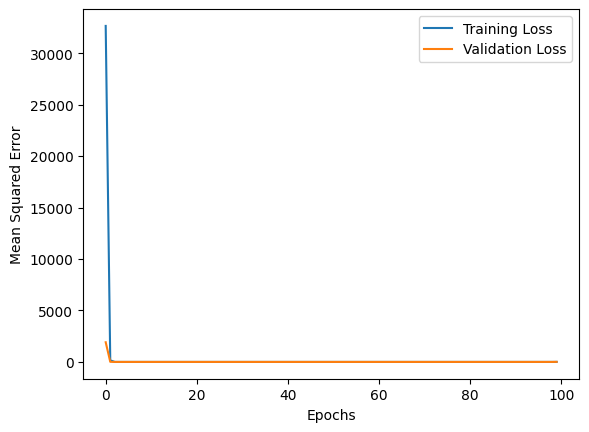

In [12]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()